In [1]:
# Referance  used:  https://www.bd-econ.com/blsapi.html
#import os
#import sys
from google.colab import drive
from google.colab import files
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
drive.mount('/content/drive/', force_remount=True)
bls_dir = '/content/drive/My Drive/Colab_Notebooks/DSCI_591_BLS'
%cd {bls_dir}

!python config.py # runs the config file to load your API details
import config # .py file with bls_key = 'API key here'

# The url for BLS API v2
url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'

# API key in config.py which contains: bls_key = 'key'
key = '?registrationkey={}'.format(config.bls_key)

# Series stored as a dictionary
series_dict = {
    'LNS14000003': 'White',
    'LNS14000006': 'Black',
    'LNS14000009': 'Hispanic',
#    'LFS224000600000': 'Num. Unemployed For Less Than 5 weeks',
#    'LFS224010700000': 'Num. Unemployed For 5-14 Weeks',
#    'LFS224001800000': 'Num. Unemployed For 15 Weeks & Over', 
#    'LFS22400310000': 'Num. Unemployed For 27 Weeks & Over'
    }

# Start year and end year
dates = ('2019', '2020')  # currently limited to 10 years?

Mounted at /content/drive/
/content/drive/My Drive/Colab_Notebooks/DSCI_591_BLS


In [2]:
# Specify json as content type to return
headers = {'Content-type': 'application/json'}

# Submit the list of series as data
data = json.dumps({
    "seriesid": list(series_dict.keys()),
    "startyear": dates[0],
    "endyear": dates[1]})

# Post request for the data
p = requests.post(
    '{}{}'.format(url, key),
    headers=headers,
    data=data).json()['Results']['series']

In [3]:
# Date index from first series
date_list = [f"{i['year']}-{i['period'][1:]}-01" for i in p[0]['data']]

# Empty dataframe to fill with values
df = pd.DataFrame()

# Build a pandas series from the API results, p
for s in p:
#    try:  
      df[series_dict[s['seriesID']]] = pd.Series(
          index = pd.to_datetime(date_list),
          data = [i['value'] for i in s['data']]
          ).astype(float).iloc[::-1]
#    except:
#      pass

#df.rename(columns={'': 'Date'}, inplace=True)
df.index.names = ['Date']
# Show last 10 results
df.to_csv(f'{bls_dir}/BLS_Pandas.csv');
df.tail(10)


,White,Black,Hispanic
Date,,,
2019-11-01,3.2,5.6,4.2
2019-12-01,3.2,5.9,4.2
2020-01-01,3.1,6.0,4.3
2020-02-01,3.1,5.8,4.4
2020-03-01,4.0,6.7,6.0
2020-04-01,14.2,16.7,18.9
2020-05-01,12.4,16.8,17.6
2020-06-01,10.1,15.4,14.5
2020-07-01,9.2,14.6,12.9


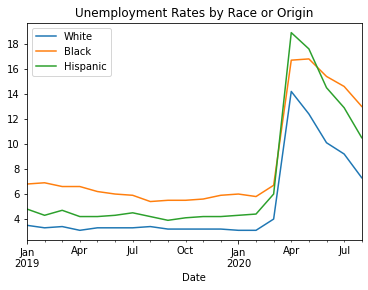

In [4]:
# Simple line plot of the data

df.plot(title='Unemployment Rates by Race or Origin')

In [5]:
bls_df = pd.read_csv(f'{bls_dir}/BLS_Pandas.csv')
list(bls_df.columns) 
#bls_df.tail()

['Date', 'White', 'Black', 'Hispanic']

In [6]:
bls_df['Date'].value_counts().sort_index().head()

2019-01-01    1
2019-02-01    1
2019-03-01    1
2019-04-01    1
2019-05-01    1
Name: Date, dtype: int64

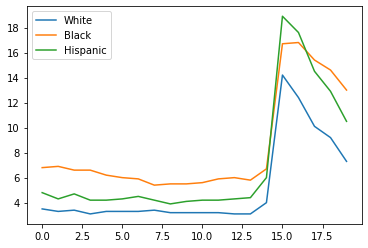

In [7]:
bls_df.plot()
